# K-Means Clustering

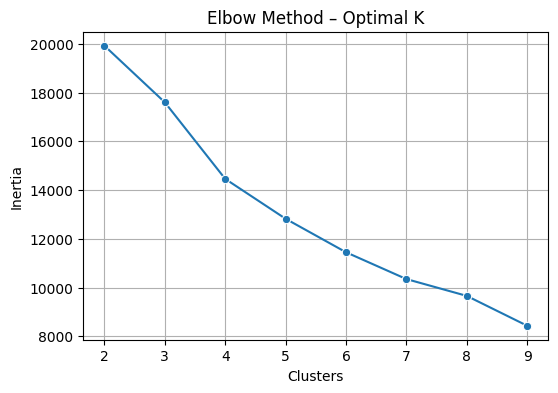

Cluster Counts:
Cluster_Label
0    2359
1     299
3     215
2       1
Name: count, dtype: int64
Clustered dataset saved as 'clustered_master_df.csv'


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv("master_df.csv")

# Step 2: Select relevant features
features = [
    'Total Steps', 'Daily Calories Burned', 'Sleep Duration',
    'HR (Mean)', 'HR (Max)', 'BMI', 'Total Intensity', 'Average Intensity'
]

# Step 3: Handle missing values
df_cluster = df[features].copy()
df_cluster = df_cluster.fillna(df_cluster.mean())

# Step 4: Check variance before clustering
if df_cluster.nunique().sum() <= len(features):
    raise ValueError("Not enough variation in selected features. Clustering not meaningful.")

# Step 5: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Optional: Plot elbow curve to find optimal K
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
sns.lineplot(x=range(2, 10), y=inertia, marker='o')
plt.title("Elbow Method – Optimal K")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 6: Apply KMeans (e.g., with k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Label'] = kmeans.fit_predict(X_scaled)

# Step 7: Check distribution of clusters
print("Cluster Counts:")
print(df['Cluster_Label'].value_counts())

# Step 8: Save for Power BI
df.to_csv("clustered_master_df.csv", index=False)
print("Clustered dataset saved as 'clustered_master_df.csv'")